### Wstęp do Uczenia Maszynowego 
##### Laboratorium 5

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='darkgrid')

import warnings
warnings.filterwarnings('ignore')

### Zadanie 2
-----
Eksperyment symulacyjny. Wygenerujmy dane w następujący sposób. Niech $n = 200$, $p = 5$. Wektor $\beta_0 = 1$, $\beta_1 = [2, 1, 0.5, 0.01, 0]$, $x_i \sim N_p(0, I)$ dla $i = 1,2, \dots, n$. $y_i$ pochodzi z rozkładu $Bern(p_i)$, gdzie $p_i=\frac{exp(\beta_0 + x_{i\cdot}\beta_1)}{1 + exp(\beta_0 + x_{i\cdot}\beta_1)}$.

a) Dopasuj model regresji logistycznej. Porównaj prawdziwe wartości wektora $\beta$ z wyestymowanymi.

b) Dopasuj model regresji logistycznej z regularyzacją $L2$ i współczynnikami $C = (10, 5, 2, 1, 0.5, 0.1, 0.01, 0.005)$. jak zmienieją się współczynniki wraz ze wzrostem współczynnika lambda?

c) Dopasuj model regresji logistycznej z regularyzacją $L1$ i współczynnikami $C = (10, 5, 2, 1, 0.5, 0.1, 0.01, 0.005)$. jak zmienieją się współczynniki wraz ze wzrostem współczynnika lambda?

d) Powtórz eksperyment 500 razy dla modelu logistycznego bez regularyzacji, z regularyzacją $L2$ i parametrem $C=1$ i regularyzacją $L1$ i parametrem $C=1$. Oblicz MSE.

In [2]:
n = 200
p = 5
beta_0 = 1
beta_1 = np.array([2, 1, 0.5, 0.01, 0])
X = np.random.normal(0, 1, size = (n, p))
Xbeta = X@beta_1+beta_0
probs = np.exp(Xbeta)/(1+np.exp(Xbeta)) 
y = np.random.binomial(1, probs) 

In [3]:
# a)
lm = LogisticRegression(penalty = None)
lm.fit(X,y)
print(lm.coef_)
print(lm.intercept_)

[[ 2.16461412  1.12226085  0.49816821  0.03715005 -0.13138877]]
[1.05855346]


In [4]:
# b)
coefs = []
intercepts = []
C = np.array([10, 5, 2, 1, 0.5, 0.1, 0.01, 0.005])

for c in C:
    lm = LogisticRegression(penalty = 'l2', C = c)
    lm.fit(X, y)
    coefs.append(lm.coef_[0])
    intercepts.append(lm.intercept_[0])

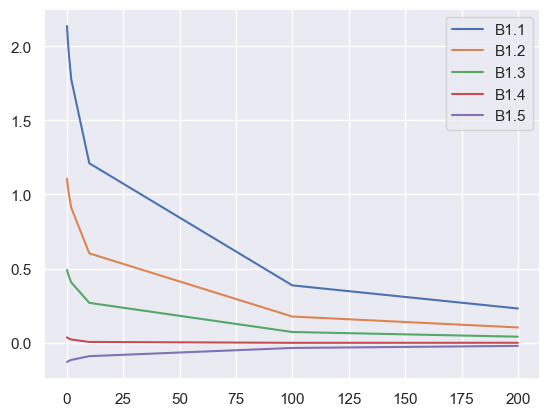

In [5]:
plt.plot(1/C, np.array(coefs), label = ['B1.1', 'B1.2', 'B1.3', 'B1.4', 'B1.5'])
plt.legend()

In [6]:
# c)
coefs = []
intercepts = []
C = np.array([10, 5, 2, 1, 0.5, 0.1, 0.01, 0.005])

for c in C:
    lm = LogisticRegression(penalty = 'l1', solver='liblinear', C = c)
    lm.fit(X, y)
    coefs.append(lm.coef_[0])
    intercepts.append(lm.intercept_[0])

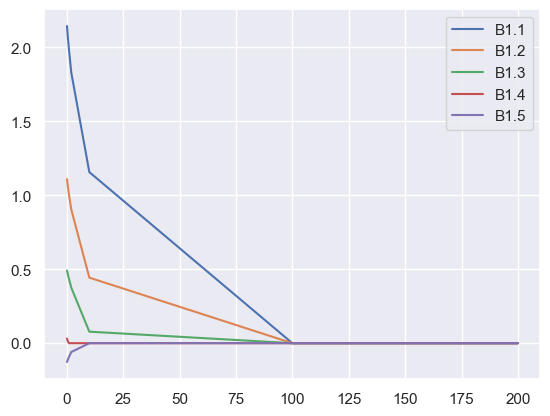

In [7]:
plt.plot(1/C, np.array(coefs), label = ['B1.1', 'B1.2', 'B1.3', 'B1.4', 'B1.5'])
plt.legend()

In [19]:
#d)
from sklearn.metrics import mean_squared_error

n = 200
p = 5
beta_0 = 1
beta_1 = np.array([2, 1, 0.5, 0.01, 0])

mse_results = pd.DataFrame(columns=['No penalty', 'L2', 'L1'])

for _ in range(500):
    X = np.random.normal(0, 1, size = (n, p))
    Xbeta = X@beta_1+beta_0
    probs = np.exp(Xbeta)/(1+np.exp(Xbeta)) 
    y = np.random.binomial(1, probs)

    # No penalty model
    glm = LogisticRegression(penalty=None)
    glm.fit(X, y)
    glm_mse = mean_squared_error(np.append(beta_1, beta_0),
                                 np.append(glm.coef_, glm.intercept_[0]))

    # L2 regularization model
    glm_l2 = LogisticRegression(penalty='l2', C=1)
    glm_l2.fit(X, y)
    glm_l2_mse = mean_squared_error(np.append(beta_1, beta_0),
                                 np.append(glm_l2.coef_, glm_l2.intercept_[0]))

    # L1 regularization model
    glm_l1 = LogisticRegression(penalty='l1', C=1, solver='liblinear')
    glm_l1.fit(X, y)
    glm_l1_mse = mean_squared_error(np.append(beta_1, beta_0),
                                 np.append(glm_l1.coef_, glm_l1.intercept_[0]))
    
    mse_results = pd.concat([mse_results, pd.DataFrame({'No penalty': glm_mse,
                                                        'L2': glm_l2_mse,
                                                        'L1': glm_l1_mse}, index=[0])])

In [22]:
mse_results.reset_index(drop=True, inplace=True)

In [25]:
mse_results.describe()

,No penalty,L2,L1
count,500.000000,500.000000,500.000000
mean,0.070341,0.045965,0.047780
std,0.073498,0.029471,0.034783
min,0.005878,0.004203,0.003407
25%,0.028904,0.025466,0.025054
50%,0.047543,0.040296,0.039692
75%,0.081760,0.059531,0.062004
max,0.678234,0.217937,0.283299


##### Laboratorium 6

<img src="svm_1.png"  width="1000"/>

###### Źródło:  James, G., Witten, D., Hastie, T., Tibshirani, R., Taylor, J. (2023). An Introduction to Statistical Learning with Applications in Python, Springer Science+Business Media, New York. https://www.statlearning.com/

In [26]:
# Losowanie dwóch zmiennych z rozkładu standardowego normalnego.
rng = np.random.default_rng(1)
X = rng.standard_normal((50,2))
y = np.array([-1]*25 + [1]*25)
# Przesunięcie punktów o wektor [2, 2].
X[y == 1] += 2

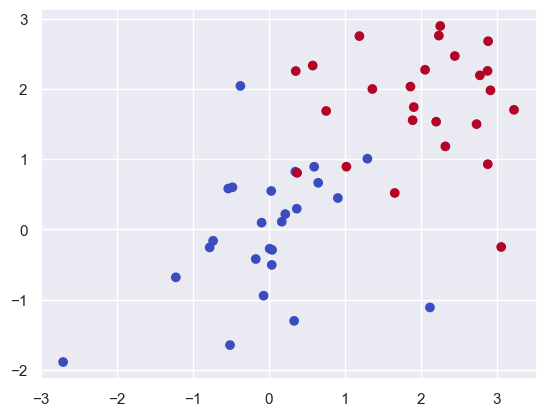

In [28]:
plt.scatter(X[:,0], X[:,1], c = y, cmap='coolwarm')

### Zadanie 1
-----
Zbuduj model wektorów podpierających wykorzystując zdefinowane X i y jak zbiór treningowy. Ustaw parametr `C` = 10, `kernel` = 'linear'.

In [29]:
from sklearn.svm import SVC

In [30]:
model = SVC(kernel='linear', C=10)
model.fit(X, y)

SVC(C=10, kernel='linear')

<img src="svm_2.png"  width="700"/>

###### Źródło:  James, G., Witten, D., Hastie, T., Tibshirani, R., Taylor, J. (2023). An Introduction to Statistical Learning with Applications in Python, Springer Science+Business Media, New York. https://www.statlearning.com/

### Wyznaczanie hiperpłaszczyzny (dla dwóch wymiarów)

$<w, x> + b = 0$

$w_1x_1 + w_2x_2 + b = 0$

$w_2x_2 = -w_1x_1 - b$

$x_2 = -\frac{w_1}{w_2}x_1 - \frac{b}{w_2}$



In [32]:
W = model.coef_[0]
b = model.intercept_[0]

A = -W[0]/W[1]
B = -b/W[1]

In [33]:
print("A", A)
print("B", B)

A -1.2644101946214434
B 2.100735351961212


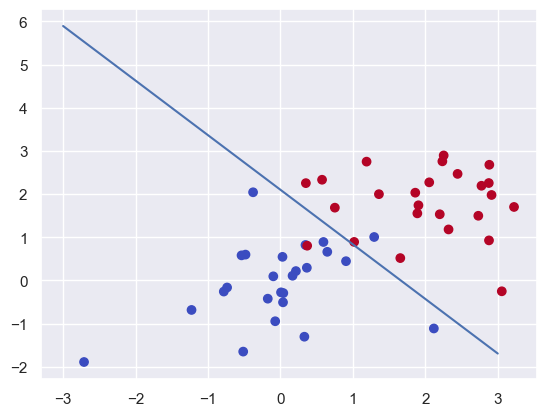

In [38]:
plt.scatter(X[:,0], X[:,1], c = y, cmap='coolwarm')
plt.plot(np.array([-3, 3]), A * np.array([-3, 3]) + B)

In [41]:
model.support_vectors_

array([[ 0.90535587,  0.44637457],
       [ 1.29406381,  1.00672432],
       [ 2.11783876, -1.11202076],
       [-0.37760501,  2.04277161],
       [ 0.59374807,  0.89116695],
       [ 0.75125111,  1.68610053],
       [ 1.01781188,  0.89262695],
       [ 1.65478429,  0.51818173],
       [ 0.36915077,  0.80483692]])

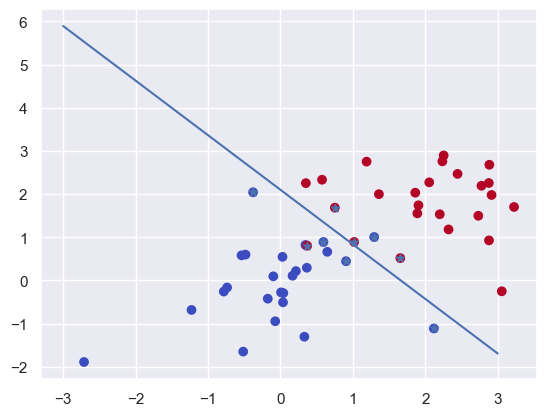

In [ ]:
support = X[model.support_]

fig, ax = plt.subplots()
plt.scatter(X[:,0], X[:,1], c = y, cmap='coolwarm')
ax.plot(np.array([-3, 3]), A * np.array([-3, 3]) + B)
ax.scatter(support[:,0], support[:,1], marker='*')

### Zadanie 2
-----
Wyznacz, które punkty są wektorami podpierającymi i zaznacz je na powyższym wykresie.

### Zadanie 3
-----
Zbuduj model wektorów podpierających wykorzystując zdefinowane X i y jak zbiór treningowy. Ustaw parametr `C` = 0.01, `kernel` = 'linear'. Narysuj płaszczyznę rozdzielającą klasy i wskaż wektory podpierające. 

In [47]:
# Losowanie dwóch zmiennych z rozkładu standardowego normalnego.
rng = np.random.default_rng(1)
X = rng.standard_normal((50,2))
y = np.array([-1]*25 + [1]*25)
# Przesunięcie punktów o wektor [1, 1].
X[y == 1] += 1

In [49]:
svm_linear = SVC(C=0.01, kernel='linear')
svm_linear.fit(X, y)

SVC(C=0.01, kernel='linear')

In [50]:
W = svm_linear.coef_[0]
b = svm_linear.intercept_[0]

A = -W[0]/W[1]
B = -b/W[1]

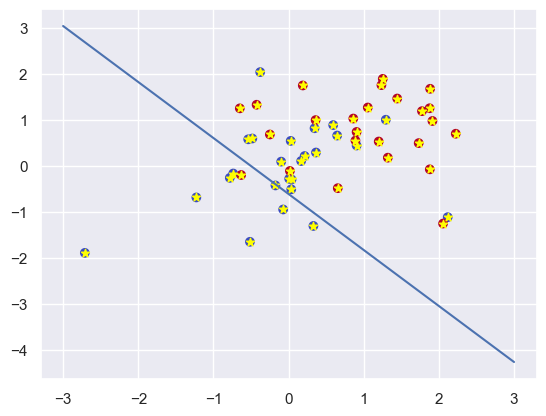

In [53]:
support = X[svm_linear.support_]

fig, ax = plt.subplots()
plt.scatter(X[:,0], X[:,1], c = y, cmap='coolwarm')
ax.plot(np.array([-3, 3]), A * np.array([-3, 3]) + B)
ax.scatter(support[:,0], support[:,1], marker='*', color='yellow')

### Wyznaczanie marginesu (dla dwóch wymiarów)

$margin_{magnitude} = \frac{1}{||w||}$

$||w|| = \sqrt{w_1^2 + w_2^2}$

$\hat{w} = \frac{w}{||w||}$


In [54]:
w = svm_linear.coef_[0]

In [55]:
w_hat = w / np.sqrt(np.sum(w ** 2))

In [59]:
w_hat

array([0.77287496, 0.63455834])

In [57]:
margin = 1 / np.sqrt(np.sum(w ** 2))

In [60]:
margin

3.043323055642944

In [58]:
decision_boundary_points = np.array(list(zip(np.array([-3,3]), A * np.array([-3,3]) + B)))
points_of_line_above = decision_boundary_points + w_hat * margin
points_of_line_below = decision_boundary_points - w_hat * margin

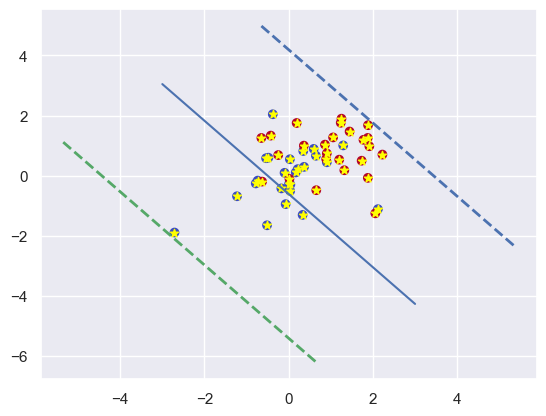

In [62]:
fig, ax = plt.subplots()
plt.scatter(X[:,0], X[:,1], c = y, cmap='coolwarm')
ax.plot(np.array([-3, 3]), A * np.array([-3, 3]) + B)
ax.scatter(support[:,0], support[:,1], marker='*', color='yellow')

# Blue margin line above
plt.plot(points_of_line_above[:, 0], 
         points_of_line_above[:, 1], 
         'b--', 
         linewidth=2)
# Green margin line below
plt.plot(points_of_line_below[:, 0], 
         points_of_line_below[:, 1], 
         'g--',
         linewidth=2)

### Optymalizacja parametru C

In [ ]:
import sklearn.model_selection as skm
kfold = skm.KFold(5,
                  random_state=0,
                  shuffle=True)

In [74]:
grid = skm.GridSearchCV(svm_linear,
                        {'C':[0.001, 0.01, 0.1, 1, 5, 10, 100]}, 
                         refit=True,
                         cv=kfold,
                         scoring='accuracy',
                         verbose=1)

In [75]:
grid.fit(X, y)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             estimator=SVC(C=0.01, kernel='linear'),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 5, 10, 100]},
             scoring='accuracy', verbose=1)

In [76]:
grid.best_params_

{'C': 1}

In [77]:
grid.best_score_

0.74

In [78]:
grid.cv_results_

{'mean_fit_time': array([0.00233717, 0.00034456, 0.00019007, 0.00160332, 0.        ,
        0.00160203, 0.0034523 ]),
 'std_fit_time': array([0.00272752, 0.00043197, 0.0002333 , 0.00320663, 0.        ,
        0.00320406, 0.0042135 ]),
 'mean_score_time': array([0.00207729, 0.00302272, 0.00170746, 0.        , 0.0015996 ,
        0.00030622, 0.00657859]),
 'std_score_time': array([0.00261891, 0.00180138, 0.00272407, 0.        , 0.0031992 ,
        0.00061245, 0.00638101]),
 'param_C': masked_array(data=[0.001, 0.01, 0.1, 1, 5, 10, 100],
              mask=[False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.001},
  {'C': 0.01},
  {'C': 0.1},
  {'C': 1},
  {'C': 5},
  {'C': 10},
  {'C': 100}],
 'split0_test_score': array([0.4, 0.4, 0.5, 0.5, 0.5, 0.5, 0.5]),
 'split1_test_score': array([0.3, 0.3, 0.8, 0.8, 0.8, 0.8, 0.8]),
 'split2_test_score': array([0.6, 0.6, 0.8, 0.9, 0.9, 0.9, 0.9]),
 'split3_test_score': array([0

Sprawdzenie modelu na zbiorze testowym

In [ ]:
rng = np.random.default_rng(1)
X_test = rng.standard_normal((20,2))
y_test = np.array([-1]*10 + [1]*10)
X_test[y_test == 1] += 2


In [79]:
from sklearn.tree import DecisionTreeClassifier

In [82]:
Tree = DecisionTreeClassifier()

kfold = skm.KFold(5,
                  random_state=0,
                  shuffle=True)

grid = skm.GridSearchCV(Tree,
                        {'criterion': ['gini', 'entropy'],
                         'max_depth': np.arange(2, 10),
                         'min_samples_leaf': np.arange(2, 10)}, 
                         refit=True,
                         cv=kfold,
                         scoring='accuracy',
                         verbose=1)

grid.fit(X, y)

Fitting 5 folds for each of 128 candidates, totalling 640 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_leaf': array([2, 3, 4, 5, 6, 7, 8, 9])},
             scoring='accuracy', verbose=1)

In [83]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 4}

In [84]:
Tree = DecisionTreeClassifier()

kfold = skm.KFold(5,
                  random_state=0,
                  shuffle=True)

random = skm.RandomizedSearchCV(Tree,
                        {'criterion': ['gini', 'entropy'],
                         'max_depth': np.arange(2, 10),
                         'min_samples_leaf': np.arange(2, 10)}, 
                         refit=True,
                         cv=kfold,
                         scoring='accuracy',
                         verbose=1)

random.fit(X, y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
                   estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_leaf': array([2, 3, 4, 5, 6, 7, 8, 9])},
                   scoring='accuracy', verbose=1)

In [ ]:
random.best_params_

{'min_samples_leaf': 5, 'max_depth': 4, 'criterion': 'gini'}

<img src="svm_3.png"  width="700"/>

###### Źródło:  James, G., Witten, D., Hastie, T., Tibshirani, R., Taylor, J. (2023). An Introduction to Statistical Learning with Applications in Python, Springer Science+Business Media, New York. https://www.statlearning.com/

### Podsumowanie, czyli co warto wiedzieć...


1. Idea regresji liniowej
2. Regresja logistyczna

    a) przekształcenie funkcją sigmoid

    b) wyliczanie współczynników metodą ML

    c) regularyzacja L1 + własności (ograniczenie liczby zmiennych)

    d) regularyzacja L2

    e) przypadek danych liniowo separowalnych

3. SVM (liniowe)

    a) wyznaczanie hiperpłaszczyzny, marginesu, wektorów podpierających

    b) przypadek danych nieseparowalnych - kara C (analogia do L2)
    
4. Funkcje straty